# modesto tutorial

This tutorial shows how to let modesto solve a simple network.

## Imports and other stuff

In [1]:
from __future__ import division

import logging
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import modesto.utils as ut
from modesto.main import Modesto

In [2]:
%matplotlib notebook

In [3]:
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(name)-36s %(levelname)-8s %(message)s',
                    datefmt='%m-%d %H:%M')
logger = logging.getLogger('Main.py')

## Network graph

A first step is to make a networkX object of the network you would like to optimize:

For the model to load correctly into modesto, you need to add some attributes to each of the nodes and edges.

For the nodes (besides the name of the node):
* **x, y, and z**: coordinates of the node in meter
* **comps**: a dictionary containing all components (except the network pipes) that are connected to the nodes. The keys of the dictionary are the names of the components, the values are the types of the components.

For the edges (besides names of the nodes where the edge starts and stops):
* **Name of the edge**
    

In [4]:
G = nx.DiGraph()

G.add_node('Producer', x=4000, y=4000, z=0,
           comps={'plant': 'ProducerVariable'})
G.add_node('EmptyNode', x=2600, y=5000, z=0,
           comps={})
G.add_node('BuildingAndStorage', x=2500, y=4600, z=0,
           comps={'building': 'RCmodel',
                  'storage': 'StorageVariable'
                  }
           )
G.add_node('Building', x=2000, y=5500, z=0,
           comps={'building': 'RCmodel'})

G.add_edge('Producer', 'EmptyNode', name='pipe1')
G.add_edge('EmptyNode', 'BuildingAndStorage', name='pipe2')
G.add_edge('EmptyNode', 'Building', name='pipe3')
    
nx.draw(G, with_labels=True, font_weight='bold')

<IPython.core.display.Javascript object>

<div id='6d1e3356-b26a-4178-ba98-ea7ba47e469f'></div>

## Setting up modesto

Decide the following characteristics of the optimization problem:
* **Horizon** of the optimization problem (in seconds)
* **Time step** of the (discrete) problem (in seconds)
* **Start time** (should be a pandas TimeStamp). Currently, weather and prixe data for 2014 are available in modesto.
* **Pipe model**: The type of model used to model the pipes. Only one type can be selected for the whole optimization problem (unlike the component model types). Possibilities: SimplePipe (= perfect pipe, no losses, no time delays), ExtensivePipe (limited mass flows and heat losses, no time delays) and NodeMethod (heat losses and time delays, but requires mass flow rates to be known in advance)

In [5]:
horizon = 5*24*3600
time_step = 3600
start_time = pd.Timestamp('20140104')
pipe_model = 'ExtensivePipe'

And create the modesto object

In [6]:
optmodel = Modesto(horizon=horizon, 
                   time_step=time_step,
                   pipe_model=pipe_model, 
                   graph=G)

02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Te


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Tg


02-17 17:00 modesto.Node                         INFO     Initializing Node Building


02-17 17:00 modesto.component.Component          INFO     Initializing Component building


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TiD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TflD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TwiD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TwD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TfiD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TiN0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TwiN0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TwN0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TfiN0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter delta_T


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter mult


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter model_type


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter day_max_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter day_min_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter night_max_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter night_min_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter bathroom_max_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter bathroom_min_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter bathroom_max_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter bathroom_min_temperature


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Q_sol_E


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Q_sol_S


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Q_sol_W


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Q_sol_N


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Q_int_D


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Q_int_N


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Te


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter Tg


02-17 17:00 modesto.Node                         INFO     Component building added to Building


02-17 17:00 modesto.Node                         INFO     Build of Building finished


02-17 17:00 modesto.Node                         INFO     Initializing Node EmptyNode


02-17 17:00 modesto.Node                         INFO     Build of EmptyNode finished


02-17 17:00 modesto.Node                         INFO     Initializing Node BuildingAndStorage


02-17 17:00 modesto.component.Component          INFO     Initializing Component building


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TiD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TflD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TwiD0


02-17 17:00 modesto.parameter.Parameter          INFO     Initializing Parameter TwD0


## Adding data

modesto is now aware of the position and interconnections between components, nodes and edges, but still needs information rergarding, weather, prices, customer demands, component sizing, etc.


### Collect data

modesto provides some useful data handling methods (found in modesto.utils). Most notable is read_time_data, that can load time-variable data from a csv file. In this example, the data that is available in the folder modesto/Data is used.

#### Weather data:

In [7]:
t_amb = ut.read_time_data('../Data/Weather', name='weatherData.csv')['Te']
t_g = ut.read_time_data('../Data/Weather', name='weatherData.csv')['Tg']
QsolN = ut.read_time_data('../Data/Weather', name='weatherData.csv')['QsolN']
QsolE = ut.read_time_data('../Data/Weather', name='weatherData.csv')['QsolS']
QsolS = ut.read_time_data('../Data/Weather', name='weatherData.csv')['QsolN']
QsolW = ut.read_time_data('../Data/Weather', name='weatherData.csv')['QsolW']

IOError: ../Data/Weather\weatherData.csv does not exist

#### Building data

In [8]:
day_max = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['day_max']
day_min = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['day_min']
night_max = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['night_max']
night_min = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['night_min']
bathroom_max = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['bathroom_max']
bathroom_min = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['bathroom_min']
floor_max = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['floor_max']
floor_min = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['floor_min']
Q_int_D = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['Q_int_D']
Q_int_N = ut.read_time_data('../Data/UserBehaviour', name='ISO13790.csv')['Q_int_N']

IOError: ../Data/UserBehaviour\ISO13790.csv does not exist

#### Electricity price

In [43]:
c_f = ut.read_time_data(path='../Data/ElectricityPrices',name='DAM_electricity_prices-2014_BE.csv')['price_BE']

### Changing parameters

In order to solve the problem, all parameters of the optimization probkem need to get a value. A list of the parameters that modesto needs and their description can be found with the following command:

In [44]:
optmodel.print_all_params()


--- Building.building ---

-TfiN0
Description: Begin temperature at state TfiN
Unit: K
InitType: fixedVal 
Upper bound: None 
Lower bound: None 
Slack: True

-Q_sol_W
Description: Western solar radiation
Unit: W

-Q_sol_S
Description: Southern solar radiation
Unit: W

-Q_sol_N
Description: Northern solar radiation
Unit: W

-bathroom_min_temperature
Description: Minimum temperature for bathroom zones
Unit: K

-Q_int_D
Description: Internal heat gains, day zones
Unit: W

-Tg
Description: Undisturbed ground temperature
Unit: K

-Q_sol_E
Description: Eastern solar radiation
Unit: W

-Te
Description: Ambient temperature
Unit: K

-Q_int_N
Description: Internal heat gains, night zones
Unit: W

-TwiD0
Description: Begin temperature at state TwiD
Unit: K
InitType: fixedVal 
Upper bound: None 
Lower bound: None 
Slack: True

-TwD0
Description: Begin temperature at state TwD
Unit: K
InitType: fixedVal 
Upper bound: None 
Lower bound: None 
Slack: True

-TfiD0
Description: Begin temperature at st

Notice how the parameters are grouped per component/edge.

It is also possible to print the parameters of a single component:

In [45]:
optmodel.print_comp_param('Producer', 'plant')


--- Producer.plant ---

-ramp_cost
Description: Ramping cost
Unit: euro/(W/s)

-CO2
Description: amount of CO2 released when using primary energy source
Unit: kg/kWh

-fuel_cost
Description: cost of fuel/electricity to generate heat
Unit: euro/kWh

-ramp
Description: Maximum ramp (increase in heat output)
Unit: W/s

-Qmax
Description: Maximum possible heat output
Unit: W

-efficiency
Description: Efficiency of the heat source
Unit: -

-PEF
Description: Factor to convert heat source to primary energy
Unit: -




Or a single parameter:

In [46]:
optmodel.print_comp_param('BuildingAndStorage', 'storage', 'kIns')


--- BuildingAndStorage.storage ---

-kIns
Description: Thermal conductivity of insulation material
Unit: W/(m.K)




Each of these parameters can now be given a value. 

For example: the general parameters (valid for the whole network)

In [47]:
optmodel.print_general_param()


--- general ---

-Tg
Description: Undisturbed ground temperature
Unit: K

-Te
Description: Ambient temperature
Unit: K




In [48]:
general_params = {'Te': t_amb,
                  'Tg': t_g}

optmodel.change_params(general_params)

Notice how all parameters are first grouped together in a dictionary and then given all at once to modesto.

If we print the parameters again, we can see the values have now been added:

In [49]:
optmodel.print_general_param('Te')


--- general ---

-Te
Description: Ambient temperature
Unit: K
Value: 2014-01-01 00:00:00    283.699218
2014-01-01 01:00:00    283.525000
2014-01-01 02:00:00    283.317192
2014-01-01 03:00:00    283.187500
2014-01-01 04:00:00    283.087500
2014-01-01 05:00:00    282.983585
2014-01-01 06:00:00    282.946095
2014-01-01 07:00:00    282.950000
2014-01-01 08:00:00    283.106250
2014-01-01 09:00:00    283.500000
2014-01-01 10:00:00    283.900000
2014-01-01 11:00:00    284.300000
2014-01-01 12:00:00    284.601032
2014-01-01 13:00:00    284.659110
2014-01-01 14:00:00    284.607037
2014-01-01 15:00:00    284.362500
2014-01-01 16:00:00    284.062500
2014-01-01 17:00:00    283.762500
2014-01-01 18:00:00    283.462500
2014-01-01 19:00:00    283.162500
2014-01-01 20:00:00    282.862500
2014-01-01 21:00:00    282.562500
2014-01-01 22:00:00    282.262500
2014-01-01 23:00:00    281.911718
2014-01-02 00:00:00    281.438798
2014-01-02 01:00:00    280.979170
2014-01-02 02:00:00    280.725000
2014-01-02 0

All of this is now repeated for the two buildings:

In [50]:
building1_params = {'delta_T': 20,
                    'mult': 100,
                    'night_min_temperature': night_min,
                    'night_max_temperature': night_max,
                    'day_min_temperature': day_min,
                    'day_max_temperature': day_max,
                    'bathroom_min_temperature': bathroom_min,
                    'bathroom_max_temperature': bathroom_max,
                    'floor_min_temperature': floor_min,
                    'floor_max_temperature': floor_max,
                    'model_type': 'SFH_T_5_ins_TAB',
                    'Q_sol_E': QsolE,
                    'Q_sol_W': QsolW,
                    'Q_sol_S': QsolS,
                    'Q_sol_N': QsolN,
                    'Q_int_D': Q_int_D,
                    'Q_int_N': Q_int_N,
                    'Te':  t_amb,
                    'Tg': t_g,
                    'TiD0': 20 + 273.15,
                    'TflD0': 20 + 273.15,
                    'TwiD0': 20 + 273.15,
                    'TwD0': 20 + 273.15,
                    'TfiD0': 20 + 273.15,
                    'TfiN0': 20 + 273.15,
                    'TiN0': 20 + 273.15,
                    'TwiN0': 20 + 273.15,
                    'TwN0': 20 + 273.15,
                    }

building2_params = building1_params.copy()
building2_params['mult'] = 300
building2_params['model_type'] = 'SFH_T_5_ins_TAB'

optmodel.change_params(building1_params, node='BuildingAndStorage',
                       comp='building')
optmodel.change_params(building2_params, node='Building',
                       comp='building')

The heat generation unit:

In [51]:
prod_design = {'efficiency': 0.95,
               'PEF': 1,
               'CO2': 0.178,  # based on HHV of CH4 (kg/KWh CH4)
               'fuel_cost': c_f,
               'Qmax': 1.5e7,
               'ramp_cost': 0.01,
               'ramp': 1e6 / 3600}

optmodel.change_params(prod_design, 'Producer', 'plant')

The storage unit:

In [52]:
stor_design = {
    'Thi': 80 + 273.15,
    'Tlo': 60 + 273.15,
    'mflo_max': 110,
    'volume': 2e4,
    'ar': 1,
    'dIns': 0.3,
    'kIns': 0.024,
    'heat_stor': 0
}

optmodel.change_params(dict=stor_design, node='BuildingAndStorage',
                       comp='storage')

And the pipes:

In [53]:
pipe1_params = {'pipe_type': 500}
pipe2_params = pipe1_params.copy()
pipe2_params['pipe_type'] = 500
pipe3_params = pipe1_params.copy()
pipe3_params['pipe_type'] = 500

optmodel.change_params(pipe1_params, comp='pipe1')
optmodel.change_params(pipe2_params, comp='pipe2')
optmodel.change_params(pipe3_params, comp='pipe3')

## Solving the optimization problem

modesto now has all required data and can compile the problem. 

In [54]:
optmodel.compile(start_time)

02-14 11:12 modesto.component.Component          INFO     Optimization block for Pipe pipe1 initialized
02-14 11:12 modesto.component.Component          INFO     Optimization model Pipe pipe1 compiled
02-14 11:12 modesto.component.Component          INFO     Optimization block for Pipe pipe3 initialized
02-14 11:12 modesto.component.Component          INFO     Optimization model Pipe pipe3 compiled
02-14 11:12 modesto.component.Component          INFO     Optimization block for Pipe pipe2 initialized
02-14 11:12 modesto.component.Component          INFO     Optimization model Pipe pipe2 compiled
02-14 11:12 modesto.Node                         INFO     Optimization block initialized for Building
02-14 11:12 modesto.component.Component          INFO     Optimization block for Component building initialized
02-14 11:12 modesto.Node                         INFO     Compilation of Building finished
02-14 11:12 modesto.Node                         INFO     Optimization block initialized for

The objective of the optimization can be selected (like cost, energy or CO2):

In [55]:
optmodel.set_objective('cost')

02-14 11:12 modesto.main.Modesto                 DEBUG    cost objective set


Finally, the problem can be solved:

In [56]:
optmodel.solve(tee=True, mipgap=0.2)

Academic license - for non-commercial use only
Changed value of parameter MIPGap to 0.2
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 15632 rows, 14665 columns and 45027 nonzeros
Model has 720 quadratic constraints
Variable types: 13942 continuous, 723 integer (723 binary)
Coefficient statistics:
  Matrix range     [1e-05, 1e+06]
  QMatrix range    [1e+00, 2e+03]
  QLMatrix range   [1e+00, 1e+00]
  Objective range  [3e-03, 1e+00]
  Bounds range     [1e+00, 2e+07]
  RHS range        [3e-02, 1e+06]
Presolve removed 11200 rows and 9146 columns
Presolve time: 0.14s
Presolved: 5152 rows, 5519 columns, 20903 nonzeros
Variable types: 4807 continuous, 712 integer (712 binary)

Root relaxation: objective 1.387468e+06, 2541 iterations, 0.29 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 1387467.69    0  265          - 1387467.69      -     

0

## Collecting results

### The objective(s)

The get_objective_function gets the value of the active objective (if no input) or of a specific objective if an extra input is given (not necessarily active, hence not an optimal value).

In [57]:
print 'Active:', optmodel.get_objective()
print 'Energy:', optmodel.get_objective('energy')
print 'Cost:  ', optmodel.get_objective('cost')

Active: 1884451.19205
Energy: 146923.206677
Cost:   1884451.19205


modesto has the get_result method, whch allows to get the optimal values of the optimization variables:

### Buildings

Collecting the data for the Building.building component:

In [58]:
TiD = optmodel.get_result('StateTemperatures', node='Building',
                           comp='building', index='TiD', state=True)
TflD = optmodel.get_result('StateTemperatures', node='Building',
                           comp='building', index='TflD', state=True)
TwiD = optmodel.get_result('StateTemperatures', node='Building',
                           comp='building', index='TwiD', state=True)
TwD = optmodel.get_result('StateTemperatures', node='Building',
                           comp='building', index='TwD', state=True)
TfiD = optmodel.get_result('StateTemperatures', node='Building',
                            comp='building', index='TfiD', state=True)
TfiN = optmodel.get_result('StateTemperatures', node='Building',
                            comp='building', index='TfiN', state=True)
TiN = optmodel.get_result('StateTemperatures', node='Building',
                           comp='building', index='TiN', state=True)
TwiN = optmodel.get_result('StateTemperatures', node='Building',
                            comp='building', index='TwiN', state=True)
TwN = optmodel.get_result('StateTemperatures', node='Building',
                           comp='building', index='TwN', state=True)
Q_hea_D = optmodel.get_result('ControlHeatFlows', node='Building',
                                comp='building', index='Q_hea_D')
Q_hea_N = optmodel.get_result('ControlHeatFlows', node='Building',
                                comp='building', index='Q_hea_N')

Creating plots:

<IPython.core.display.Javascript object>


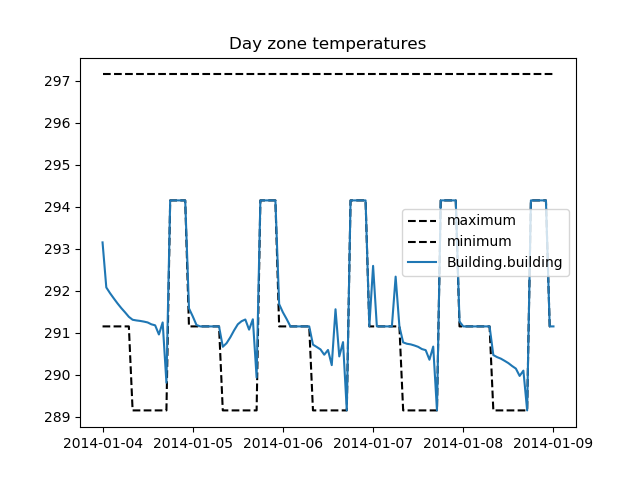

<IPython.core.display.Javascript object>


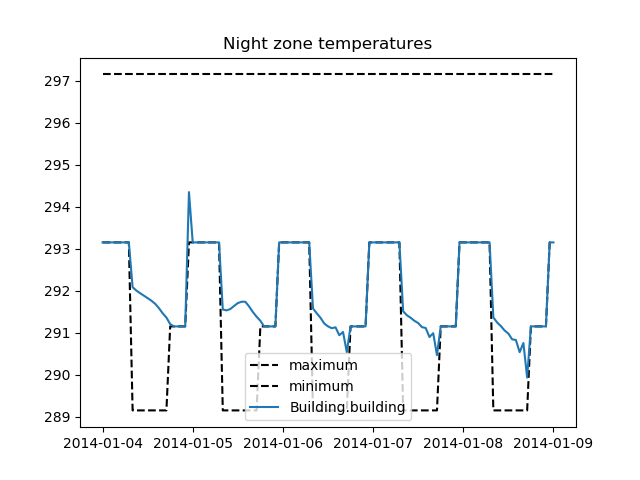

<IPython.core.display.Javascript object>


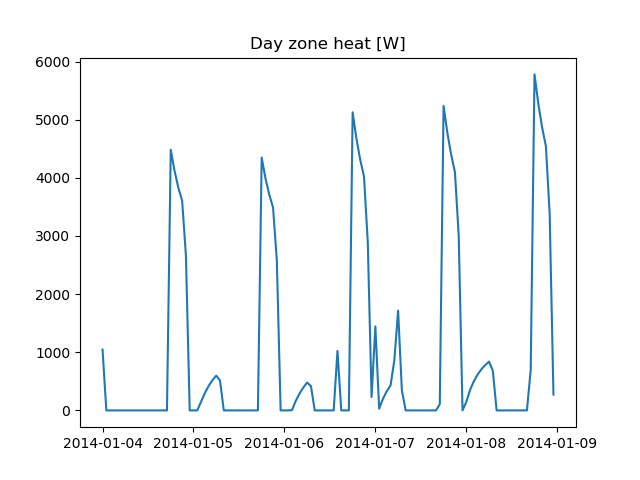

<IPython.core.display.Javascript object>


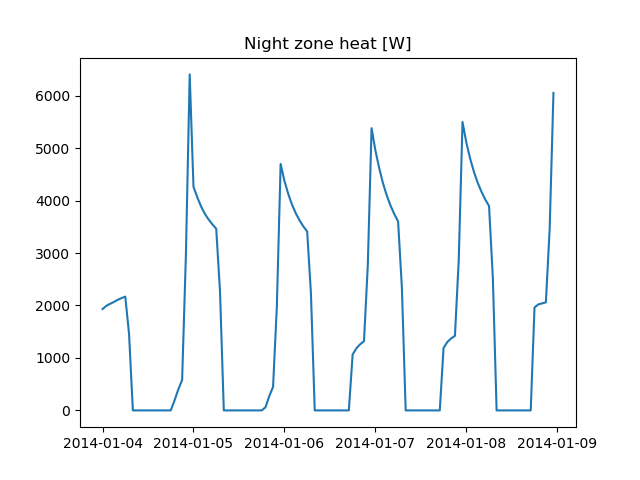

<IPython.core.display.Javascript object>


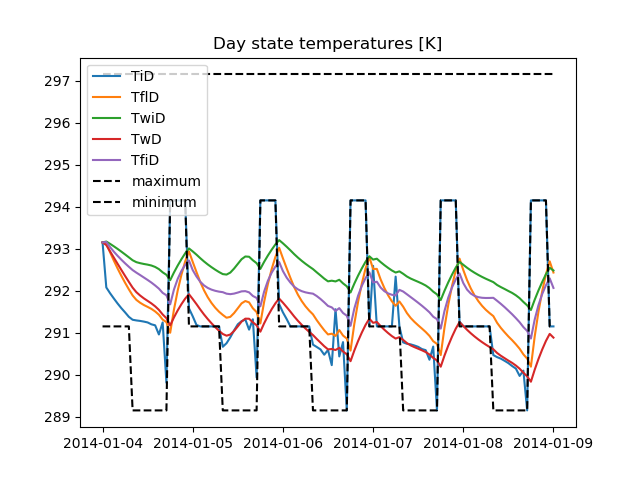

<IPython.core.display.Javascript object>


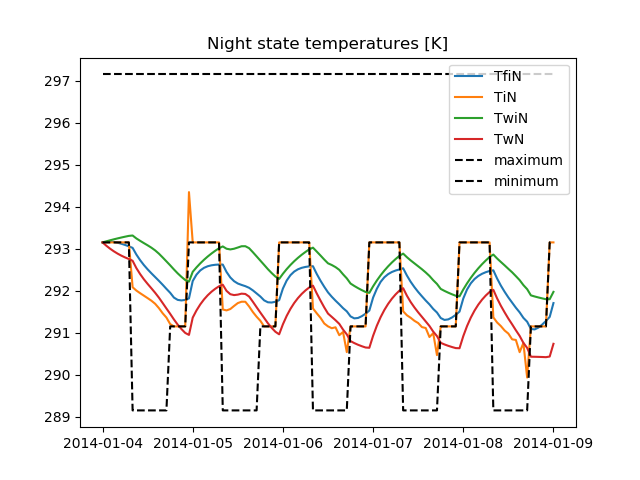

Text(0.5,1,u'Night state temperatures [K]')

In [59]:
day_max = ut.read_period_data('../Data/UserBehaviour', name='ISO13790.csv',
                              time_step=time_step, horizon=horizon, start_time=start_time)['day_max']
day_min = ut.read_period_data('../Data/UserBehaviour', name='ISO13790.csv',
                              time_step=time_step, horizon=horizon, start_time=start_time)['day_min']
night_max = ut.read_period_data('../Data/UserBehaviour', name='ISO13790.csv',
                                time_step=time_step, horizon=horizon, start_time=start_time)['night_max']
night_min = ut.read_period_data('../Data/UserBehaviour', name='ISO13790.csv',
                                time_step=time_step, horizon=horizon, start_time=start_time)['night_min']

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# ax1 = fig1.add_subplot(221)
ax1.plot(day_max, label='maximum', linestyle='--', color='k')
ax1.plot(day_min, label='minimum', linestyle='--', color='k')
ax1.plot(TiD, label='Building.building')
ax1.legend()
ax1.set_title('Day zone temperatures')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(night_max, label='maximum', linestyle='--', color='k')
ax2.plot(night_min, label='minimum', linestyle='--', color='k')
ax2.plot(TiN, label='Building.building')
ax2.legend()
ax2.set_title('Night zone temperatures')

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.plot(Q_hea_D)
ax3.set_title('Day zone heat [W]')

fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
ax4.plot(Q_hea_N)
ax4.set_title('Night zone heat [W]')

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
ax5.plot(TiD, label='TiD')
ax5.plot(TflD, label='TflD')
ax5.plot(TwiD, label='TwiD')
ax5.plot(TwD, label='TwD')
ax5.plot(TfiD, label='TfiD')
ax5.plot(day_max, label='maximum', linestyle='--', color='k')
ax5.plot(day_min, label='minimum', linestyle='--', color='k')
ax5.legend()
ax5.set_title('Day state temperatures [K]')

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
ax6.plot(TfiN, label='TfiN')
ax6.plot(TiN, label='TiN')
ax6.plot(TwiN, label='TwiN')
ax6.plot(TwN, label='TwN')
ax6.plot(night_max, label='maximum', linestyle='--', color='k')
ax6.plot(night_min, label='minimum', linestyle='--', color='k')
ax6.legend()
ax6.set_title('Night state temperatures [K]')

## Storage unit

In [60]:
storage_stored_heat = optmodel.get_result('heat_stor', node='BuildingAndStorage',
                                  comp='storage')
storage_heat_flow = optmodel.get_result('heat_flow', node='BuildingAndStorage',
                                 comp='storage')

<IPython.core.display.Javascript object>


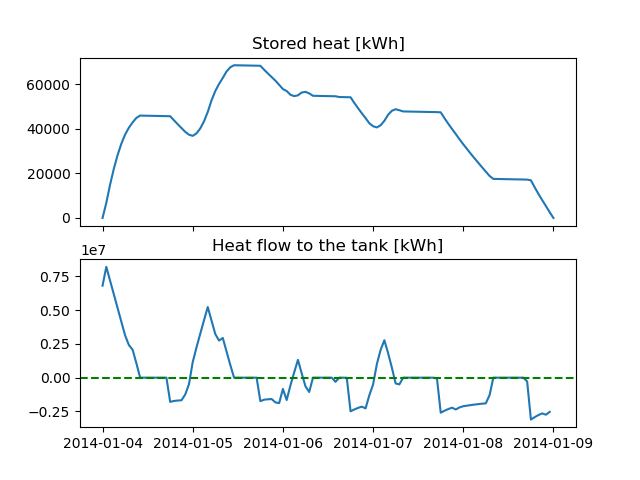

In [61]:
fig1, (ax, ax2) = plt.subplots(2,1, sharex=True)
ax.plot(storage_stored_heat)
ax.set_title('Stored heat [kWh]')
ax2.plot(storage_heat_flow)
ax2.set_title('Heat flow to the tank [kWh]')
ax2.axhline(linestyle='--', color='g')

## Heat generation unit

In [62]:
prod_hf = optmodel.get_result('heat_flow', node='Producer', comp='plant')
c_f = ut.read_period_data(path='../Data/ElectricityPrices',
                          name='DAM_electricity_prices-2014_BE.csv',
                          time_step=time_step, horizon=horizon,
                          start_time=start_time)['price_BE']

<IPython.core.display.Javascript object>


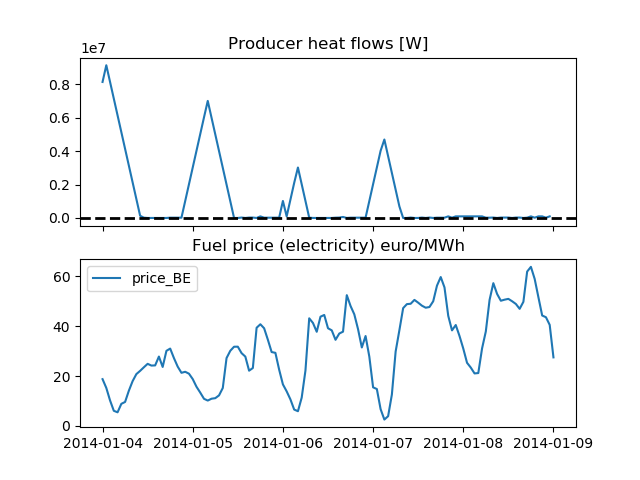

In [63]:
fig, (ax, ax1) = plt.subplots(2, 1 , sharex=True)
ax.plot(prod_hf)

ax.axhline(y=0, linewidth=2, color='k', linestyle='--')
ax.set_title('Producer heat flows [W]')

ax1.plot(c_f)
ax1.set_title('Fuel price (electricity) euro/MWh')
ax1.legend()
#fig.tight_layout()

The plot clearly shows that the cost objective is followed, with the heat generation unit preferring moments of low electricity price to inject heat into the network.

Looking at the plots of the storage unit, you can see that most of this heat is stored there and used at a later time to keep the buildings sufficiently warm.

## Network efficiency

In [64]:
# Heat flows
prod_hf = optmodel.get_result('heat_flow', node='Producer', comp='plant')
storage_hf = optmodel.get_result('heat_flow', node='BuildingAndStorage',
                                 comp='storage')
waterschei_hf = optmodel.get_result('heat_flow', node='BuildingAndStorage',
                                    comp='building')
zwartberg_hf = optmodel.get_result('heat_flow', node='Building',
                                   comp='building')


# Sum of heat flows
prod_e = sum(prod_hf)
storage_e = sum(storage_hf)
waterschei_e = sum(waterschei_hf)
zwartberg_e = sum(zwartberg_hf)

# Efficiency
print '\nNetwork efficiency', (storage_e + waterschei_e + zwartberg_e) / prod_e * 100, '%'


Network efficiency 95.1878649942 %
